<span STYLE="font-size:200%"> 
    Data analysis of the BOSE stress-relaxation test
</span>

Docker image: gnasello/datascience-env:2023-07-16 \
Conda environment: R \
Latest update: 26 July 2023

# Load required packages and data

In [1]:
library(ggplot2)
library(ggpubr)
library(investr)

Load the [r_utils scirpts](https://github.com/gabnasello/r_utils.git) from GitHub

You can debug the *r_utils* script by downloading the GitHub project from terminal and chance the argument of the `source` function (open it from JupyterLab):

`git clone https://github.com/gabnasello/r_utils.git`

How to Reuse Functions That You Create In Scripts, [tutorial](https://www.earthdatascience.org/courses/earth-analytics/multispectral-remote-sensing-data/source-function-in-R/)

In [2]:
source("https://raw.githubusercontent.com/gabnasello/r_utils/main/ggplot_utils.R")
source("https://raw.githubusercontent.com/gabnasello/r_utils/main/stats_utils.R")

Set the parameters of the `cyto_plot()` function

In [3]:
label_text_size = 1.4; label_fill_alpha = 0.2; label_text_font = 1
axes_text_size = 1.4
axes_label_text_size = 1.6; title_text_size = 1.5; header_text_size = 1.3
legend_text_size = 1.7

## Load data

<span style="color:red">**User Input**</span>

In [6]:
filetable <- 'data/GN015_C-2_1 04062023 040128_tdf.CSV'

In [7]:
# skip - the first three lines of tdf.CSV files are not relevant for the dataframe object 
df_original <- read.csv(file=filetable, skip = 3)
head(df_original)

Warning message in readLines(file, skip):
“line 1 appears to contain an embedded nul”


,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,Sec,mm,g,mm,mm,%,NA
2,0.0000,-3.297996,0.359,0.000,1.7683,0.00,NA
3,0.0100,-3.298453,0.343,0.000,1.7678,-0.01,NA
4,0.0200,-3.299149,0.343,0.000,1.7671,-0.01,NA
5,0.0300,-3.299972,0.374,0.000,1.7663,-0.01,NA
6,0.0400,-3.301129,0.313,0.000,1.7652,-0.01,NA


Show units

In [8]:
units <- df_original[1,]
units

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,Sec,mm,g,mm,mm,%,NA


# Data pre-processing

## Remove not relevant data

In [9]:
#delete 1st row
df <- df_original[-1,]

# Remove DataFrame last column with Base R
df <- df[1: ncol(df)-1 ]

# Convert all variable types to numeric
df <- as.data.frame(apply(df, 2, as.numeric))  
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00
2,0.01,-3.298453,0.343,0,1.7678,-0.01
3,0.02,-3.299149,0.343,0,1.7671,-0.01
4,0.03,-3.299972,0.374,0,1.7663,-0.01
5,0.04,-3.301129,0.313,0,1.7652,-0.01
6,0.05,-3.301817,0.389,0,1.7645,-0.02


## Create time variable

In [10]:
df['time'] <- df['Elapsed.Time']
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05


## Create load variable

Set the initial load value to zero, which corresponds to the tare load. 

In [11]:
df['load'] <- df['Load.3'] - max(df[1:20, 'Load.3'])
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015


## Create displacement variable

Set the initial position of the plate to zero

In [12]:
df['displacement'] = df[1, 'Disp'] - df['Disp']
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821


# Load and Displament vs Time

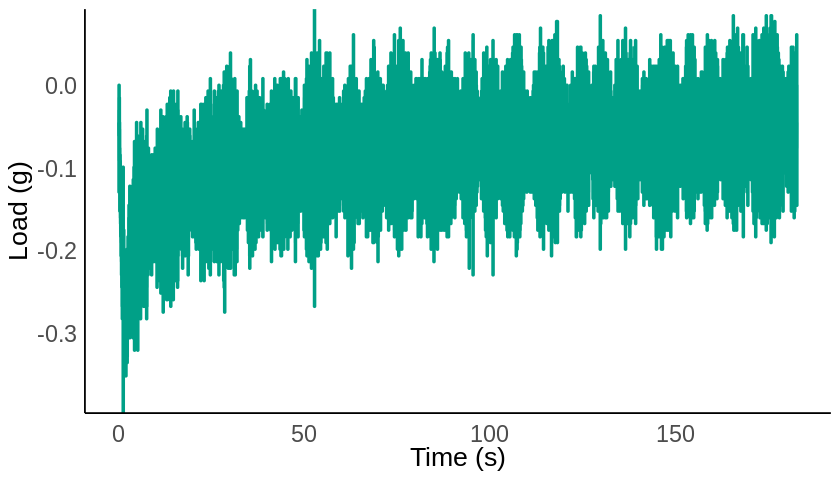

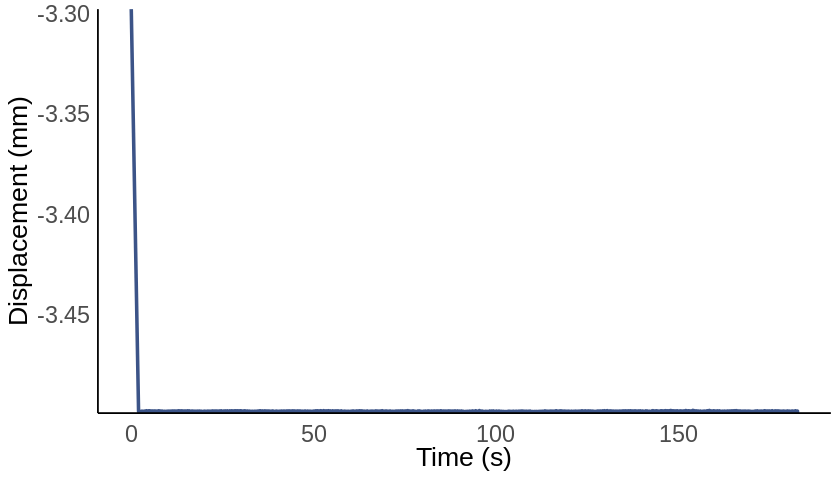

In [13]:
p1 <- ggplot(df, aes(x = time, y = load)) + 
     geom_line(linewidth=1, color="#00A087FF")    

img1 <- ggplotMinAethetics(p1, width=7, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Time (s)', 
                          ylabel='Load (g)', 
                          legend.position="none"
                          )

p2 <- ggplot(df, aes(x = time, y = Disp)) + 
     geom_line(linewidth=1, color="#3C5488FF")    

img2 <- ggplotMinAethetics(p2, width=7, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Time (s)', 
                          ylabel='Displacement (mm)', 
                          legend.position="none"
                          )

img1
img2

# Select interval of interest

<span style="color:red">**User Input**</span>

In [14]:
test_start <- 2 #seconds

In [15]:
df <- df[df['time'] <= test_start, ]
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821


# Convert Load (in grams) to Force (in milli Newtons) and change sign

In [16]:
g_acc = 9.80665 # m/s2

df['force'] = df['load'] * (-g_acc) # g * m/s^2 = mN (10^-3 N)
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998


# Raw Plots

## Load vs Time

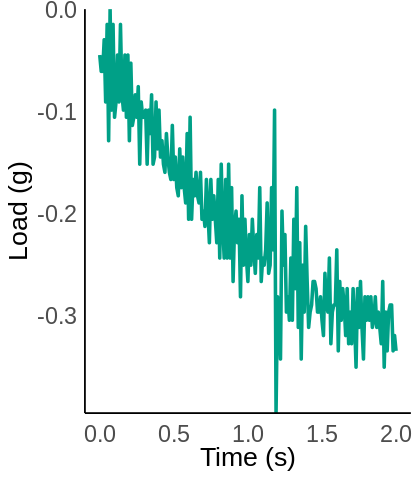

In [17]:
p <- ggplot(df, aes(x = time, y = load)) + 
     geom_line(linewidth=1, color="#00A087FF")    

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Time (s)', 
                          ylabel='Load (g)', 
                          legend.position="none"
                          )
       # scale_y_continuous(expand=c(0,0), limits=c(0,170)) 

img

## Force vs Displacement

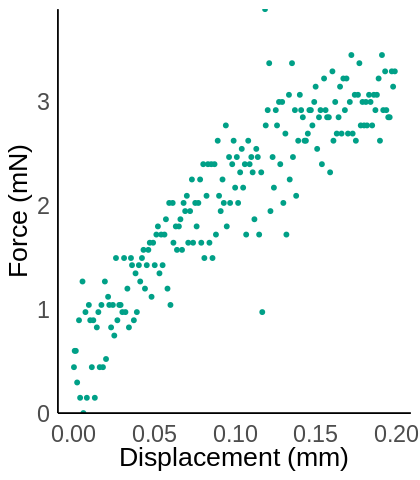

In [18]:
p <- ggplot(df, aes(x = displacement, y = force)) + 
     geom_point(size=1, color="#00A087FF")    

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Displacement (mm)', 
                          ylabel='Force (mN)', 
                          legend.position="none"
                          )

img

# Unit conversions

## Convert forces to stresses (Pa)

<span style="color:red">**User Input**</span>

In [19]:
radius <- 5 # mm

sample_area <- pi * (radius^2) # mm^2

df['stress'] <- df['force']/sample_area * 1e03 # mN / mm^2 * 10**3 = Pa
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993,5.618797
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056,7.616591
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056,7.616591
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995,3.745864
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052,11.362455
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998,1.872932


## Convert displacements to strains (%)

<span style="color:red">**User Input**</span>

In [20]:
sample_thickness <- df[1,'NetDisp'] # mm

df['strain'] <- df['displacement']/sample_thickness #
df['strain100'] <- df['strain'] * 100
head(df)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993,5.618797,0.0000000000,0.00000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056,7.616591,0.0002584403,0.02584403
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056,7.616591,0.0006520387,0.06520387
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995,3.745864,0.0011174574,0.11174574
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052,11.362455,0.0017717582,0.17717582
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998,1.872932,0.0021608324,0.21608324


# Stress vs Strain plot

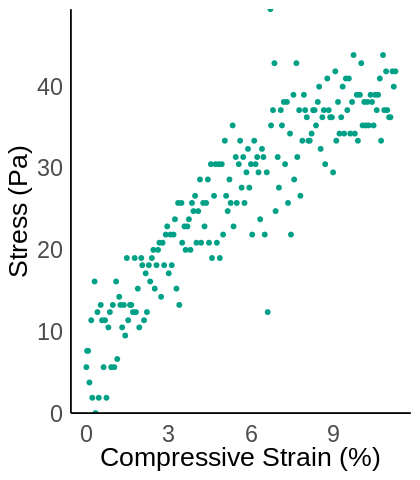

In [21]:
p <- ggplot(df, aes(x = strain100, y = stress)) + 
     geom_point(size=1, color="#00A087FF")    

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Compressive Strain (%)', 
                          ylabel='Stress (Pa)', 
                          legend.position="none"
                          )

img

# Save data

Save new `.csv` file in the same directory where the orginal dataset is located

In [22]:
filename_stem <- tools::file_path_sans_ext(filetable)
newfile <- paste(filename_stem, '_compression_analyzed.csv')
newfile

[1] "data/4F_1 07312023 031708_tdf _compression_analyzed.csv"

In [23]:
write.csv(df, newfile)

# Young modulus (E) calculation

In [24]:
young_values <- data.frame(min_strain100=double(),
                           max_strain100=double(),
                           young_pa=double()
                           )
young_values

min_strain100,max_strain100,young_pa
<dbl>,<dbl>,<dbl>


## E 0-1% strain

In [25]:
min_strain100 = 0
max_strain100 = 1

In [26]:
df_young <- df[df['strain100']>=min_strain100 & df['strain100']<=max_strain100,]
tail(df_young)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0.13,-3.310011,0.313,0,1.7563,-0.01,0.13,-0.091,0.012015,0.8924052,11.362455,0.006794662,0.6794662
15,0.14,-3.310943,0.389,0,1.7553,-0.01,0.14,-0.015,0.012947,0.1470998,1.872932,0.007321721,0.7321721
16,0.15,-3.312183,0.320,0,1.7541,-0.01,0.15,-0.084,0.014187,0.8237586,10.488420,0.008022960,0.8022960
17,0.16,-3.313130,0.305,0,1.7532,-0.01,0.16,-0.099,0.015134,0.9708584,12.361352,0.008558503,0.8558503
18,0.17,-3.313985,0.359,0,1.7523,-0.01,0.17,-0.045,0.015989,0.4412993,5.618797,0.009042018,0.9042018
19,0.18,-3.315043,0.298,0,1.7512,-0.01,0.18,-0.106,0.017047,1.0395049,13.235387,0.009640333,0.9640333


### Build regression model

In [27]:
model = lm( stress ~ strain + 0, data=df_young)
summary(model)


Call:
lm(formula = stress ~ strain + 0, data = df_young)

Residuals:
   Min     1Q Median     3Q    Max 
-7.895 -1.877  2.255  6.505 12.107 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
strain   1334.1      244.2   5.463 3.45e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.869 on 18 degrees of freedom
Multiple R-squared:  0.6238,	Adjusted R-squared:  0.6029 
F-statistic: 29.84 on 1 and 18 DF,  p-value: 3.449e-05


In [28]:
# young modulus in Pascal
young_pa <- unname(model$coefficients['strain'])

message <- sprintf('--------------\n\n\nYoung modulus: %.2f Pa\n\n\n--------------', young_pa)
cat(message)

--------------


Young modulus: 1334.11 Pa


--------------

In [29]:
young_values <- rbind(young_values, data.frame(min_strain100=min_strain100,
                                               max_strain100=max_strain100,
                                               young_pa=young_pa
                                               )
                     )
young_values

min_strain100,max_strain100,young_pa
<dbl>,<dbl>,<dbl>
0,1,1334.114


### Plot regression model

Add 'fit', 'lwr', and 'upr' columns to dataframe (generated by predict). This is useful to [to plot an already-existing linear model](https://stackoverflow.com/questions/44865508/using-ggplot2-to-plot-an-already-existing-linear-model)

In [30]:
model.predict <- cbind(df, predict(model, df['strain'], interval = 'confidence'))
head(model.predict)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993,5.618797,0.0000000000,0.00000000,0.0000000,0.0000000,0.0000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056,7.616591,0.0002584403,0.02584403,0.3447888,0.2121862,0.4773914
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056,7.616591,0.0006520387,0.06520387,0.8698938,0.5353406,1.2044470
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995,3.745864,0.0011174574,0.11174574,1.4908155,0.9174615,2.0641694
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052,11.362455,0.0017717582,0.17717582,2.3637271,1.4546593,3.2727950
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998,1.872932,0.0021608324,0.21608324,2.8827965,1.7740993,3.9914936


plot the points (actual observations), regression line, and confidence interval

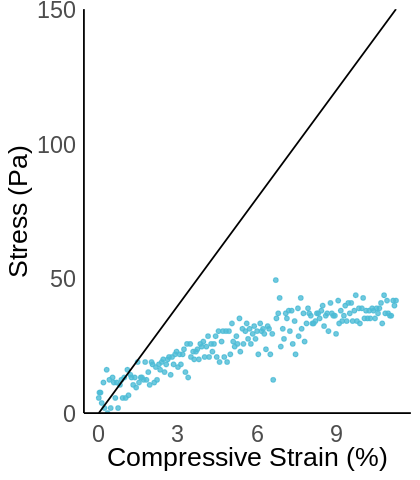

In [31]:
p <- ggplot(model.predict, aes(x = strain100, y = stress)) + 
     geom_point(size=1, color="#4DBBD5FF", alpha=0.8)  + 
     geom_line(aes(strain100, fit))

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Compressive Strain (%)', 
                          ylabel='Stress (Pa)', 
                          legend.position="none"
                          )
       # scale_y_continuous(expand=c(0,0), limits=c(0,260)) 

img

## E 0-5% strain

In [32]:
min_strain100 = 0
max_strain100 = 5

In [33]:
df_young <- df[df['strain100']>=min_strain100 & df['strain100']<=max_strain100,]
tail(df_young)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85,0.84,-3.381140,0.160,0,1.6851,-0.01,0.84,-0.244,0.083144,2.392823,30.46636,0.04701917,4.701917
86,0.85,-3.382067,0.237,0,1.6842,-0.01,0.85,-0.167,0.084071,1.637711,20.85198,0.04754340,4.754340
87,0.86,-3.383216,0.160,0,1.6831,-0.01,0.86,-0.244,0.085220,2.392823,30.46636,0.04819318,4.819318
88,0.87,-3.383972,0.252,0,1.6823,-0.01,0.87,-0.152,0.085976,1.490611,18.97905,0.04862071,4.862071
89,0.88,-3.385220,0.160,0,1.6811,-0.01,0.88,-0.244,0.087224,2.392823,30.46636,0.04932647,4.932647
90,0.89,-3.386107,0.229,0,1.6802,-0.01,0.89,-0.175,0.088111,1.716164,21.85088,0.04982808,4.982808


### Build regression model

In [34]:
model = lm( stress ~ strain + 0, data=df_young)
summary(model)


Call:
lm(formula = stress ~ strain + 0, data = df_young)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1375  -0.8871   1.8669   4.5444  14.2500 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
strain   619.42      18.46   33.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 89 degrees of freedom
Multiple R-squared:  0.9268,	Adjusted R-squared:  0.9259 
F-statistic:  1126 on 1 and 89 DF,  p-value: < 2.2e-16


In [35]:
# young modulus in Pascal
young_pa <- unname(model$coefficients['strain'])

message <- sprintf('--------------\n\n\nYoung modulus: %.2f Pa\n\n\n--------------', young_pa)
cat(message)

--------------


Young modulus: 619.42 Pa


--------------

In [36]:
young_values <- rbind(young_values, data.frame(min_strain100=min_strain100,
                                                 max_strain100=max_strain100,
                                                 young_pa=young_pa
                                                 )
                     )
young_values

min_strain100,max_strain100,young_pa
<dbl>,<dbl>,<dbl>
0,1,1334.1139
0,5,619.4176


### Plot regression model

Add 'fit', 'lwr', and 'upr' columns to dataframe (generated by predict). This is useful to [to plot an already-existing linear model](https://stackoverflow.com/questions/44865508/using-ggplot2-to-plot-an-already-existing-linear-model)

In [37]:
model.predict <- cbind(df, predict(model, df['strain'], interval = 'confidence'))
head(model.predict)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993,5.618797,0.0000000000,0.00000000,0.0000000,0.0000000,0.0000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056,7.616591,0.0002584403,0.02584403,0.1600825,0.1506046,0.1695604
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056,7.616591,0.0006520387,0.06520387,0.4038843,0.3799717,0.4277968
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995,3.745864,0.0011174574,0.11174574,0.6921728,0.6511918,0.7331539
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052,11.362455,0.0017717582,0.17717582,1.0974583,1.0324817,1.1624348
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998,1.872932,0.0021608324,0.21608324,1.3384577,1.2592124,1.4177030


plot the points (actual observations), regression line, and confidence interval

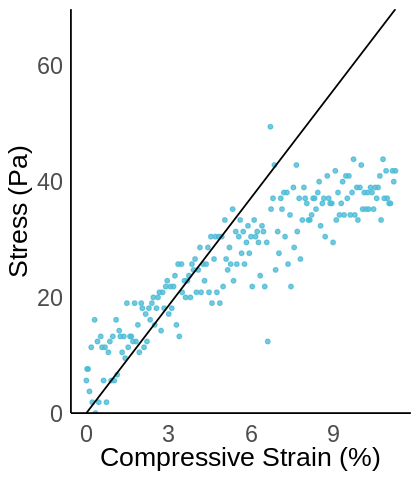

In [38]:
p <- ggplot(model.predict, aes(x = strain100, y = stress)) + 
     geom_point(size=1, color="#4DBBD5FF", alpha=0.8)  + 
     geom_line(aes(strain100, fit))

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Compressive Strain (%)', 
                          ylabel='Stress (Pa)', 
                          legend.position="none"
                          )
       # scale_y_continuous(expand=c(0,0), limits=c(0,260)) 

img

## E 0-10% strain

In [39]:
min_strain100 = 0
max_strain100 = 10

In [40]:
df_young <- df[df['strain100']>=min_strain100 & df['strain100']<=max_strain100,]
tail(df_young)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
173,1.72,-3.469181,0.099,0,1.5971,-0.01,1.72,-0.305,0.171185,2.991028,38.08295,0.09680767,9.680767
174,1.73,-3.470142,0.053,0,1.5961,-0.01,1.73,-0.351,0.172146,3.442134,43.82661,0.09735113,9.735113
175,1.74,-3.470937,0.130,0,1.5954,-0.01,1.74,-0.274,0.172941,2.687022,34.21223,0.09780071,9.780071
176,1.75,-3.472239,0.092,0,1.5941,-0.01,1.75,-0.312,0.174243,3.059675,38.95699,0.09853701,9.853701
177,1.76,-3.472930,0.137,0,1.5934,-0.01,1.76,-0.267,0.174934,2.618376,33.33819,0.09892778,9.892778
178,1.77,-3.474236,0.092,0,1.5921,-0.01,1.77,-0.312,0.176240,3.059675,38.95699,0.09966635,9.966635


### Build regression model

In [41]:
model = lm( stress ~ strain + 0, data=df_young)
summary(model)


Call:
lm(formula = stress ~ strain + 0, data = df_young)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.934  -1.510   2.889   7.143  18.704 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
strain  458.443      8.482   54.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.499 on 177 degrees of freedom
Multiple R-squared:  0.9429,	Adjusted R-squared:  0.9425 
F-statistic:  2921 on 1 and 177 DF,  p-value: < 2.2e-16


In [42]:
# young modulus in Pascal
young_pa <- unname(model$coefficients['strain'])

message <- sprintf('--------------\n\n\nYoung modulus: %.2f Pa\n\n\n--------------', young_pa)
cat(message)

--------------


Young modulus: 458.44 Pa


--------------

In [43]:
young_values <- rbind(young_values, data.frame(min_strain100=min_strain100,
                                                 max_strain100=max_strain100,
                                                 young_pa=young_pa
                                                 )
                     )
young_values

min_strain100,max_strain100,young_pa
<dbl>,<dbl>,<dbl>
0,1,1334.1139
0,5,619.4176
0,10,458.4429


### Plot regression model

Add 'fit', 'lwr', and 'upr' columns to dataframe (generated by predict). This is useful to [to plot an already-existing linear model](https://stackoverflow.com/questions/44865508/using-ggplot2-to-plot-an-already-existing-linear-model)

In [44]:
model.predict <- cbind(df, predict(model, df['strain'], interval = 'confidence'))
head(model.predict)

,Elapsed.Time,Disp,Load.3,DispE,NetDisp,Axial.err,time,load,displacement,force,stress,strain,strain100,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,-3.297996,0.359,0,1.7683,0.00,0.00,-0.045,0.000000,0.4412993,5.618797,0.0000000000,0.00000000,0.0000000,0.0000000,0.0000000
2,0.01,-3.298453,0.343,0,1.7678,-0.01,0.01,-0.061,0.000457,0.5982056,7.616591,0.0002584403,0.02584403,0.1184801,0.1141539,0.1228063
3,0.02,-3.299149,0.343,0,1.7671,-0.01,0.02,-0.061,0.001153,0.5982056,7.616591,0.0006520387,0.06520387,0.2989225,0.2880076,0.3098374
4,0.03,-3.299972,0.374,0,1.7663,-0.01,0.03,-0.030,0.001976,0.2941995,3.745864,0.0011174574,0.11174574,0.5122905,0.4935846,0.5309963
5,0.04,-3.301129,0.313,0,1.7652,-0.01,0.04,-0.091,0.003133,0.8924052,11.362455,0.0017717582,0.17717582,0.8122500,0.7825913,0.8419087
6,0.05,-3.301817,0.389,0,1.7645,-0.02,0.05,-0.015,0.003821,0.1470998,1.872932,0.0021608324,0.21608324,0.9906183,0.9544467,1.0267900


plot the points (actual observations), regression line, and confidence interval

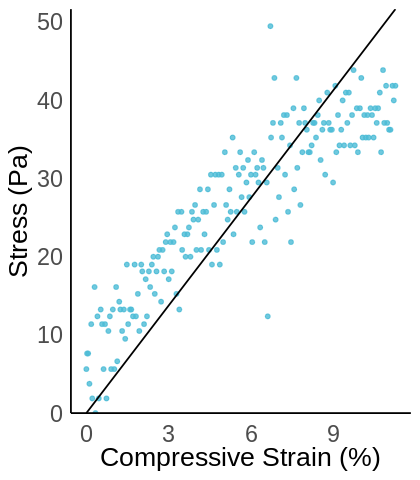

In [45]:
p <- ggplot(model.predict, aes(x = strain100, y = stress)) + 
     geom_point(size=1, color="#4DBBD5FF", alpha=0.8)  + 
     geom_line(aes(strain100, fit))

img <- ggplotMinAethetics(p, width=3.5, height=4,
                          plot.title=element_text(size = 13),
                          xlabel='Compressive Strain (%)', 
                          ylabel='Stress (Pa)', 
                          legend.position="none"
                          )
       # scale_y_continuous(expand=c(0,0), limits=c(0,130)) 

img

## Save data

In [46]:
young_values

min_strain100,max_strain100,young_pa
<dbl>,<dbl>,<dbl>
0,1,1334.1139
0,5,619.4176
0,10,458.4429


Save new `.csv` file in the same directory where the orginal dataset is located

In [47]:
filename_stem <- tools::file_path_sans_ext(filetable)
newfile <- paste(filename_stem, '_young_modulus.csv')
newfile

[1] "data/4F_1 07312023 031708_tdf _young_modulus.csv"

In [48]:
write.csv(young_values, newfile)